<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>

- Clustering problems
- $k$-means clustering
- Voronoi tesselation

<hr/>

In [ ]:
%pylab inline

<h1><font color="darkblue">Clustering</font></h1>
<hr/>

## Statistical Learning

- The methods in general fall in these 4 categories

>|     Type       | Supervised     |         Unsupervised     |
 |----------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



## Clustering is ...
<img src=files/clusters.png align=right width=200>

... the process of collecting a set of objects into groups or clusters of similar items

#### For example,

- Discover different species of birds based on their photographs
- Segment an image based on the pixel colors
- Organize news articles that cover the same story

<!--<img src="http://www.codeproject.com/KB/recipes/439890/clustering-process.png" width=450 align=left /> -->

In [ ]:
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


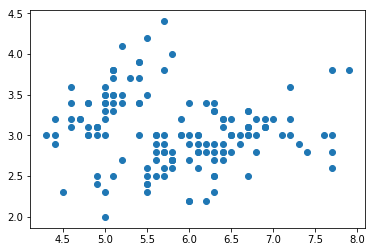

In [1]:
iris = datasets.load_iris()
X = iris.data[:,:2] 
# only the first 2 features

scatter(X[:,0],X[:,1]);

## Types of Algorithms

- Flat

>0. Start with a random partitioning
>0. Iterate to improve the grouping

- Hierarchical

>0. Greedy grouping of closest: bottom up
>0. Greedy splitting of farthest: top down

### Flat example

<img src=files/kmeans.gif>
<!--
<img src=http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif  align=left width=300> -->

### Hierarchical example

> Set

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Clusters.svg/250px-Clusters.svg.png width=150 align=center>

> Dendogram

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png width=250>

## $k$-means clustering

A simple (flat) algorithm


### Optimization

- Formally, it's an optimization over the possible groupings of objects

> For a set of $\{ x_l \}$ where $x_l\in \mathbb{R}^d$ for all $l$

>$\displaystyle  \hat{\boldsymbol{C}} = \textrm{arg}\min_{\boldsymbol{C}} \sum_{i=1}^k \left[\ \sum_{x\in{}C_i}\ \lvert\!\lvert x-\mu_i\rvert\!\rvert^2 \right] $

> where 

>$\displaystyle  \mu_i = \frac{1}{\lvert{C_i}\rvert}\sum_{x\in{}C_i} x $

### Algorithm

- Iteratively improving the $\mu_i$ **prototypes** of $k$ clusters

>0. Pick $k$ random objects as the initial $\mu_i$ prototypes
>0. Find for each object the closest prototype and assign to that cluster
>0. Calculate the averages for each cluster to get new $\mu_i$
>0. Repeat until convergence

- Often very fast - but no proof

### Animation

<!--<img src=http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif align=left width=300>-->
<img src=files/kmeans.gif align=left width=300>

- Click on these <a href=http://shabal.in/visuals/kmeans/1.html>animations</a> to see the process of $k$-means clustering in action
 
> Starting from different points...

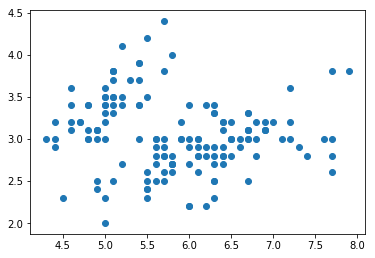

In [2]:
figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1]);

In [ ]:
from sklearn.cluster import KMeans

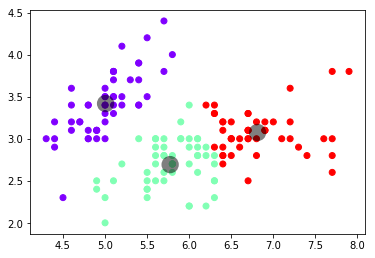

In [3]:
# 3 clusters by setting n_clusters=3
kmeans = KMeans(init='random', n_clusters=3, n_init=100)
kmeans.fit(X)

# Plot the result
figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap=cm.rainbow);

C = kmeans.cluster_centers_
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

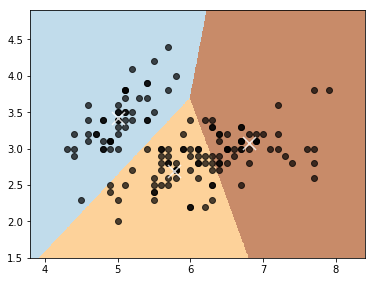

In [4]:
# Step size of the mesh. 
h = .005    # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() -.5, X[:, 0].max() +.5
y_min, y_max = X[:, 1].min() -.5, X[:, 1].max() +.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
P = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
P = P.reshape(xx.shape)
figure(figsize=(6,6)); subplot(111,aspect='equal')
plt.clf()

plt.imshow(P, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='equal', origin='lower', alpha=0.7)

plt.scatter(X[:, 0], X[:, 1], c='k', alpha=0.7)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10, alpha=0.8)

plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);

## Detour: Voronoi Tessellation & Delaunay Triangulation

<img src=http://christophermanning.org/images/2012/12/59dfbaa41a678cd39a4cc5b94ab8919740e51d9c.png align=left width=600>

## Limitations

- Initialization matters

> Rerun multiple times: **n_init** (default=10) <br/>
> Smart(er) starting points

- Assumes spherical clusters (use of distance function)

> Preprocessing becomes important even in simple cases <br>
> For example, whitening...

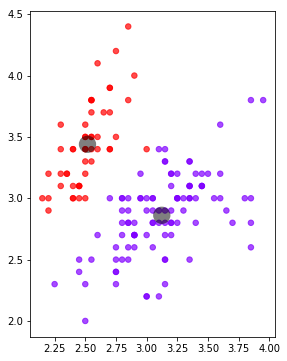

In [5]:
# transformations might help
Z = X.copy()
Z[:,0] *= 0.5

kmeans = KMeans(n_clusters=2,n_init=100,init='k-means++')
kmeans.fit(Z)
C, L = kmeans.cluster_centers_, kmeans.labels_

figure(figsize=(6,6)); ax=subplot(aspect='equal')
scatter(Z[:,0],Z[:,1],c= L, marker='o',s= 30,alpha=0.7,cmap=cm.rainbow);
scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

## What $k$?

- How many clusters?

> Too many? <br/>
> Too few?

- Various diagnostics

> Check the minimum value of the cost function? <br/>
> Characterize the clusters - Gaussian? spherical?



## Exercise

- Run $k$-means on this [CSV](files/Class-Clusters.csv) file
- Try different parameters
- How many clusters did you find?

(200, 3)

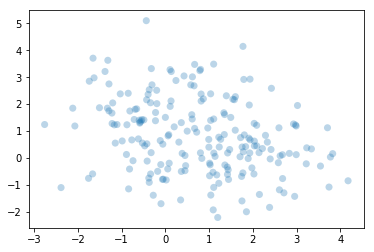

In [6]:
X = loadtxt('files/Class-Clusters.csv', delimiter=',')
scatter(X[:,0],X[:,1],s=50,alpha=0.3,edgecolor='none');
X.shape

In [ ]:
from sklearn.cluster import KMeans

1 2636.3618164079335 -2636.3618164079335
2 894.8485584691716 -894.8485584691721
3 565.9146431928173 -565.9146431928177
4 504.1987826762837 -504.1987826762841
5 454.20509350489044 -454.20509350489044
6 409.62605092275544 -409.62605092275527
7 374.7671295779743 -374.7671295779743
8 340.99307165076607 -340.9930716507661
9 317.1941223804013 -317.19412238040115


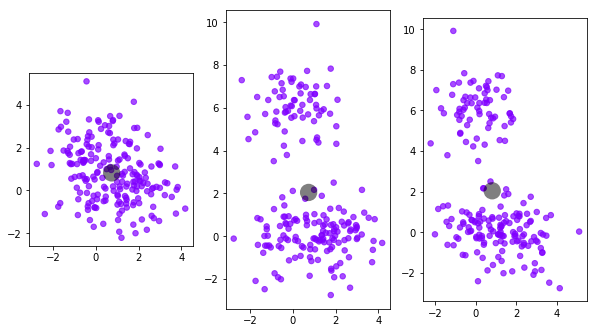

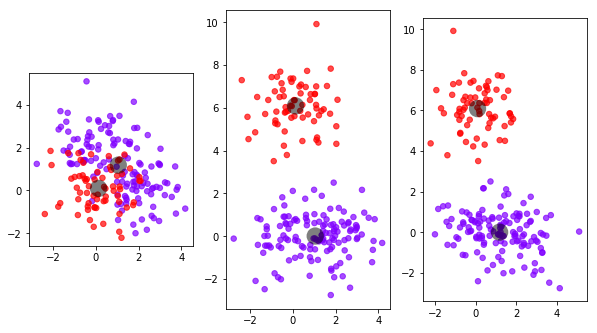

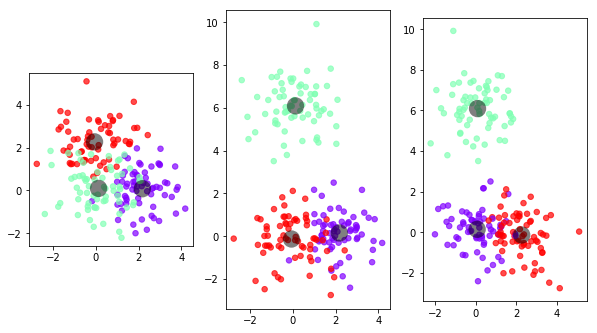

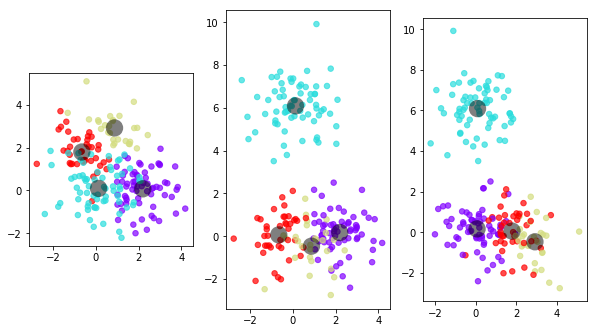

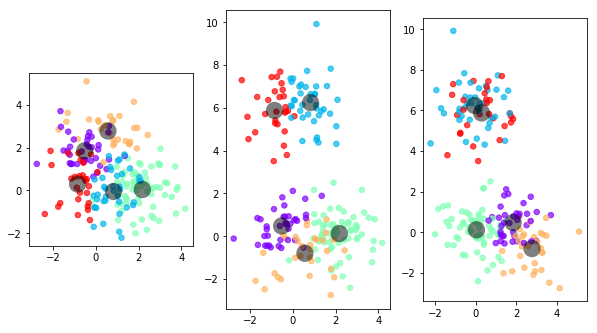

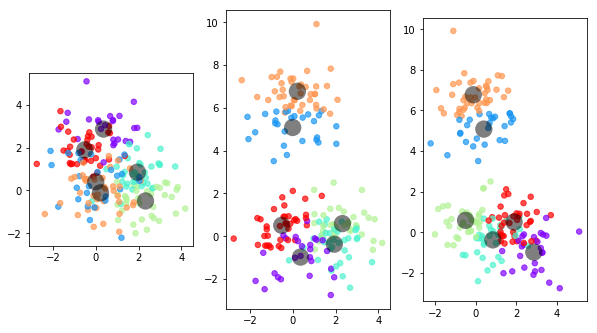

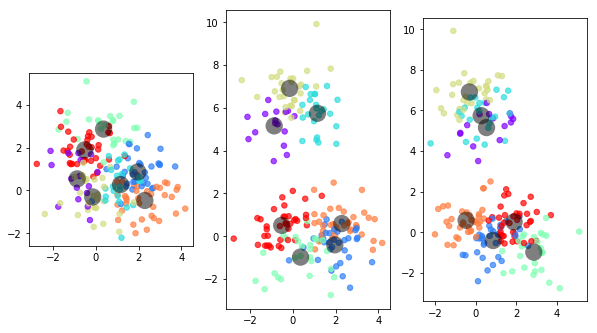

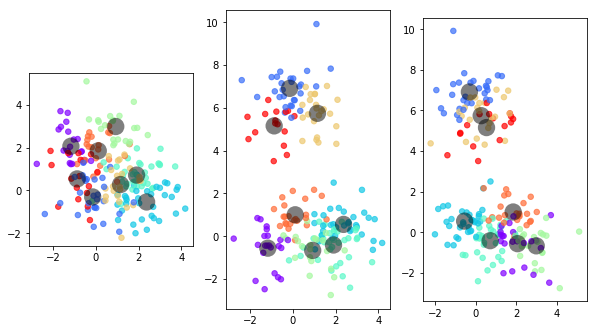

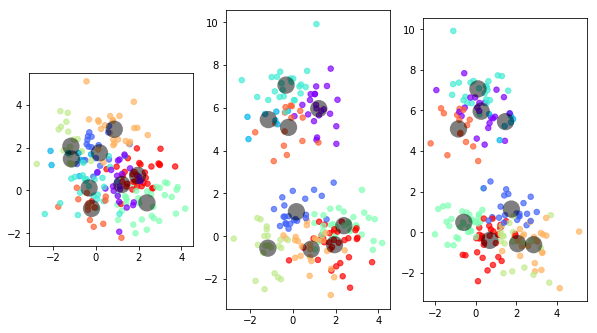

In [7]:
klist = []
slist = []

for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters=n_clusters,n_init=100,init='k-means++')
    kmeans.fit(X)
    C, L = kmeans.cluster_centers_, kmeans.labels_
    print (n_clusters, kmeans.inertia_, kmeans.score(X))
    klist.append(n_clusters)
    slist.append(kmeans.inertia_)
    
    figure(figsize=(10,6)); 
    for i,j in [(0,1),(0,2),(1,2)]:
        subplot(1,3,(i+j), aspect='equal')
        scatter(X[:,i],X[:,j],c= L, marker='o',s= 30,alpha=0.7,cmap=cm.rainbow);
        scatter(C[:,i],C[:,j],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

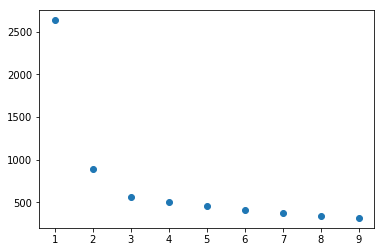

In [8]:
plot(klist,slist, 'o');

## $k$-medians clustering

Replace mean with median for cluster centers <br/>
Euclidean ($L_2$) vs Taxicab ($L_1$) distance 

<h1><font color="darkblue">Summary of K-Means</font></h1>
<hr/>

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Intuition

- Minimize the sum of squares (distance between each point and centroid) within each cluster

<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width=400 align=center>
<p style="text-align:right">(Picture from https://en.wikipedia.org/wiki/K-means_clustering)</p>

### Mathematically

- Given data $ \displaystyle \  X = (x_{ij})_{n \times d} \  $, try to cluster $ \displaystyle \  n \  $ observations into $ \displaystyle \  k (\le n) \  $ sets $ \displaystyle \  S = \{S_1, S_2, \cdots, S_k\} \  $ to minimize the within-cluster sum of squares
> $ \displaystyle \arg\min_{S} \sum_{i=1}^{k} \sum_{\mathbf{x} \in S_i} \lvert\lvert \mathbf{x} - \mathbf{\mu}_i \rvert\rvert^2 $

### Procedure

- Choose $ k $ initial centroids

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5e/K_Means_Example_Step_1.svg" width=300 align=left>

- Cluster each data point to its nearest centroid

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a5/K_Means_Example_Step_2.svg" width=300 align=left>

- Update $ k $ new centroids

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3e/K_Means_Example_Step_3.svg" width=300 align=left>

- Repeat until the centroids do not move significantly

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/K_Means_Example_Step_4.svg" width=300 align=left>

<p style="text-align:right">(Picture from https://en.wikipedia.org/wiki/K-means_clustering)</p>

### Example

In [3]:
digits = datasets.load_digits()
data = scale(digits.data)

In [4]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

print(' Number of digits: %d \n Number of samples: %d \n Number of features: %d' % (n_digits, n_samples, n_features))

 Number of digits: 10 
 Number of samples: 1797 
 Number of features: 64


In [5]:
# Cluster
kmeans = KMeans(n_clusters=n_digits, random_state=2018)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2018, tol=0.0001, verbose=0)

In [6]:
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

69465.354960396595

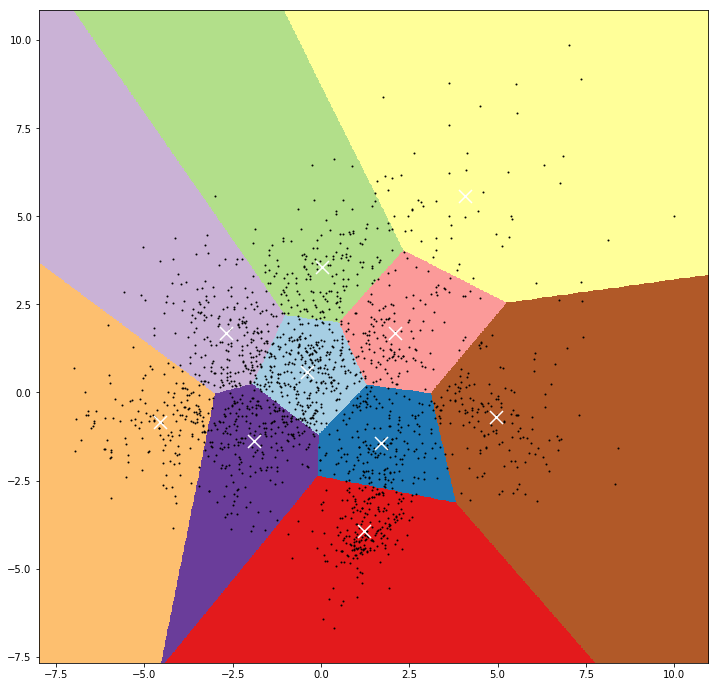

In [7]:
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(n_clusters=n_digits, random_state=2018)
kmeans.fit(reduced_data);

# Step size of the mesh
h = 0.02     

# Plot the decision boundary
x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:,1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain clusters for each point in mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Obtain the centroids of each cluster
centroids = kmeans.cluster_centers_

# Put the result into a color plot
Z = Z.reshape(xx.shape)

figure(figsize=(12, 12))
imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower');
plot(reduced_data[:,0], reduced_data[:,1], 'k.', markersize=2);
scatter(centroids[:,0], centroids[:,1], marker='x', s=169, linewidths=3, color='w', zorder=10);

- **Note:** For `KMeans` in scikit-learn
> Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the `k-means++` initialization scheme, which has been implemented in scikit-learn (use the `init='k-means++'` parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization.

[References](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Assumptions of K-Means

In [8]:
# Generate data
n_samples = 1500
random_state = 2018
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

In [9]:
# 3 'class'
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([500, 500, 500]))

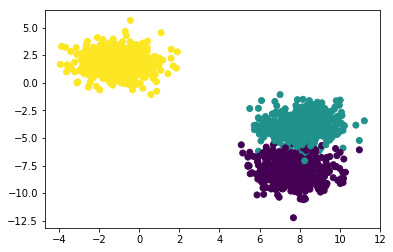

In [10]:
scatter(X[:,0], X[:,1], c=y);

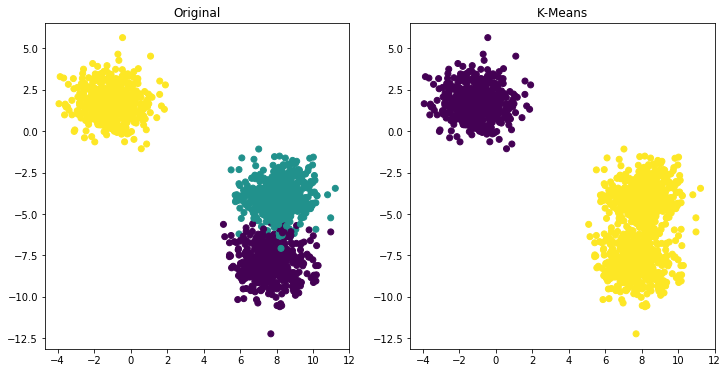

In [11]:
# Incorrect number of clusters
c1 = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

figure(figsize=(12, 6))
subplot(121);
title('Original');
scatter(X[:,0], X[:,1], c=y);
subplot(122);
title('K-Means');
scatter(X[:,0], X[:,1], c=c1);

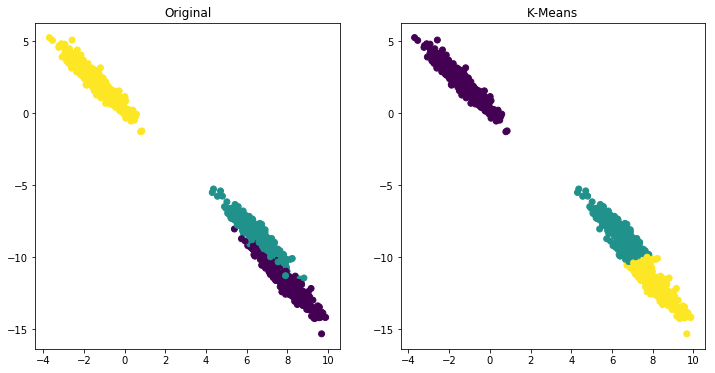

In [12]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X2 = np.dot(X, transformation)
c2 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X2)

figure(figsize=(12, 6))
subplot(121);
title('Original');
scatter(X2[:,0], X2[:,1], c=y);e
subplot(122);
title('K-Means');
scatter(X2[:,0], X2[:,1], c=c2);

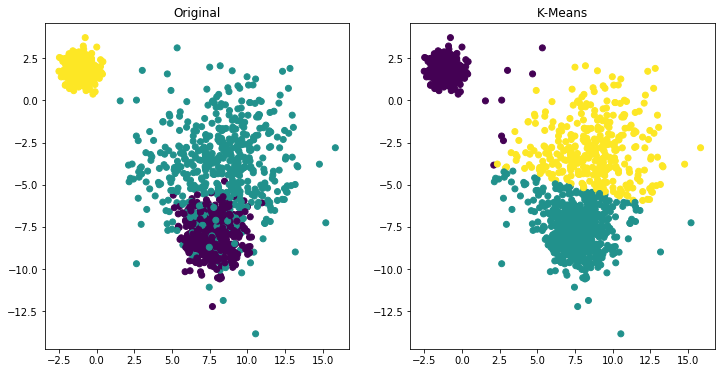

In [13]:
# Different variance
X3, y3 = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
c3 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X3)

figure(figsize=(12, 6))
subplot(121);
title('Original');
scatter(X3[:,0], X3[:,1], c=y3);
subplot(122);
title('K-Means');
scatter(X3[:,0], X3[:,1], c=c3);

- To be continued with Gaussian Mixture Model